In [845]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate
plt.rcParams["figure.figsize"] = (15,8.5)
plt.rcParams.update({'font.family':'fantasy','font.size':12})

In [846]:
road_crash_data = pd.read_csv("Road_Crashes.csv")

In [847]:
row_count = len(road_crash_data)
row_count

13

In [848]:
road_crash_data

,Month,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,January,1110,1138,1086,1068,1332,1500,1546,1498,1645,1945
1,February,1111,1040,1047,1013,1354,1581,1526,1413,1793,1694
2,March,974,1061,1099,1130,1251,1734,1654,1636,1815,1840
3,April,470,992,1013,1186,1205,1554,1507,1479,1656,1771
4,May,631,1103,1055,1220,1283,1588,1444,1585,1761,1793
5,June,782,976,1031,1046,1219,1523,1482,1350,1617,1971
6,July,922,1116,1123,1095,1149,1604,1569,1561,1735,1867
7,August,1026,1143,1086,1118,1303,1556,1664,1465,1690,1979
8,September,1270,1113,1068,1105,1162,1512,1509,1561,1567,1823
9,October,1328,1079,1001,1032,1105,1444,1452,1626,1564,1845


In [849]:
type(road_crash_data)

pandas.core.frame.DataFrame

In [850]:
road_crash_data.head(5)

,Month,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,January,1110,1138,1086,1068,1332,1500,1546,1498,1645,1945
1,February,1111,1040,1047,1013,1354,1581,1526,1413,1793,1694
2,March,974,1061,1099,1130,1251,1734,1654,1636,1815,1840
3,April,470,992,1013,1186,1205,1554,1507,1479,1656,1771
4,May,631,1103,1055,1220,1283,1588,1444,1585,1761,1793


In [851]:
road_crash_data.Month

0       January
1      February
2         March
3         April
4           May
5          June
6          July
7        August
8     September
9       October
10     November
11     December
12        Total
Name: Month, dtype: object

In [852]:
type(road_crash_data.Month)

pandas.core.series.Series

In [853]:
January_data = road_crash_data[road_crash_data.Month == 'January']

In [854]:
January_data

,Month,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,January,1110,1138,1086,1068,1332,1500,1546,1498,1645,1945


In [855]:
February_data = road_crash_data[road_crash_data.Month == 'February']

In [856]:
February_data

,Month,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
1,February,1111,1040,1047,1013,1354,1581,1526,1413,1793,1694


In [857]:
road_crash_data

,Month,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,January,1110,1138,1086,1068,1332,1500,1546,1498,1645,1945
1,February,1111,1040,1047,1013,1354,1581,1526,1413,1793,1694
2,March,974,1061,1099,1130,1251,1734,1654,1636,1815,1840
3,April,470,992,1013,1186,1205,1554,1507,1479,1656,1771
4,May,631,1103,1055,1220,1283,1588,1444,1585,1761,1793
5,June,782,976,1031,1046,1219,1523,1482,1350,1617,1971
6,July,922,1116,1123,1095,1149,1604,1569,1561,1735,1867
7,August,1026,1143,1086,1118,1303,1556,1664,1465,1690,1979
8,September,1270,1113,1068,1105,1162,1512,1509,1561,1567,1823
9,October,1328,1079,1001,1032,1105,1444,1452,1626,1564,1845


In [858]:
road_crash_data = road_crash_data.drop(road_crash_data.index[12])

In [859]:
road_crash_data

,Month,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,January,1110,1138,1086,1068,1332,1500,1546,1498,1645,1945
1,February,1111,1040,1047,1013,1354,1581,1526,1413,1793,1694
2,March,974,1061,1099,1130,1251,1734,1654,1636,1815,1840
3,April,470,992,1013,1186,1205,1554,1507,1479,1656,1771
4,May,631,1103,1055,1220,1283,1588,1444,1585,1761,1793
5,June,782,976,1031,1046,1219,1523,1482,1350,1617,1971
6,July,922,1116,1123,1095,1149,1604,1569,1561,1735,1867
7,August,1026,1143,1086,1118,1303,1556,1664,1465,1690,1979
8,September,1270,1113,1068,1105,1162,1512,1509,1561,1567,1823
9,October,1328,1079,1001,1032,1105,1444,1452,1626,1564,1845


In [860]:
road_crash_data_2020 = road_crash_data[['Month', '2020']]
road_crash_data_2019 = road_crash_data[['Month', '2019']]

In [861]:
road_crash_data_2020

,Month,2020
0,January,1110
1,February,1111
2,March,974
3,April,470
4,May,631
5,June,782
6,July,922
7,August,1026
8,September,1270
9,October,1328


In [862]:
x = road_crash_data_2020['Month']
y_2020 = road_crash_data_2020['2020']
y_2019 = road_crash_data_2019['2019']

In [863]:
type(x)

pandas.core.series.Series

In [864]:
x = x.tolist()

In [865]:
type(x)

list

In [866]:
x

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [867]:
y_2020 = list(map(int, y_2020))
y_2019 = list(map(int, y_2019))

In [868]:
y_2020

[1110, 1111, 974, 470, 631, 782, 922, 1026, 1270, 1328, 1180, 1445]

In [869]:
y_2019

[1138, 1040, 1061, 992, 1103, 976, 1116, 1143, 1113, 1079, 984, 1113]

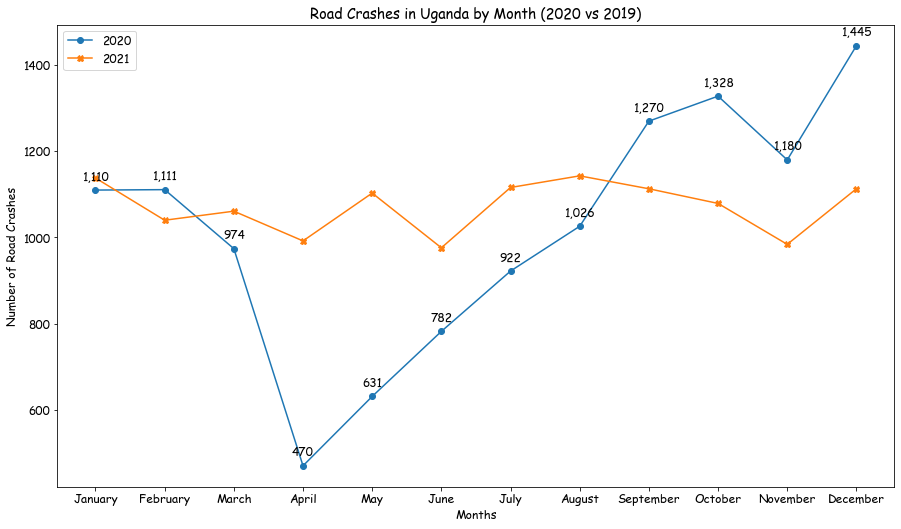

In [870]:
plt.plot(x,y_2020,marker='o')
plt.plot(x,y_2019,marker='X')
plt.title("Road Crashes in Uganda by Month (2020 vs 2019)")
plt.xlabel("Months")
plt.ylabel("Number of Road Crashes")
plt.legend(["2020","2021"], loc ="lower")
#joins the x and y values
for x,y_2020 in zip(x,y_2020):

    label = "{:,}".format(y_2020)

    plt.annotate(label, # this is the value which we want to label (text)
                 (x,y_2020), # x and y is the points location where we have to label
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 ha='center')
plt.show()